<a href="https://colab.research.google.com/github/shivam003a/DeepLearning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing neccessary libraries**

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**2. Importing datasets**

In [203]:
train_dataset = h5py.File('/content/drive/MyDrive/archive/catvnoncat/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('/content/drive/MyDrive/archive/catvnoncat/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_set_y = train_set_y.reshape((1,train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1,test_set_y.shape[0]))

In [204]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
 
print ("Dataset dimensions:")
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Dataset dimensions:
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**3. Pre-processing of the data**

In [206]:
# Flattening of the data
train_set_x_flatten = train_set_x_orig.reshape((-1, train_set_x_orig.shape[0]))
test_set_x_flatten = test_set_x_orig.reshape((-1, test_set_x_orig.shape[0]))

# Normalizing of the Data
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

print("train_set_x : " + str(train_set_x.shape))
print("train_set_y : " + str(train_set_y.shape))
print("test_set_x : " + str(test_set_x.shape))
print("test_set_y : " + str(test_set_y.shape))

train_set_x : (12288, 209)
train_set_y : (1, 209)
test_set_x : (12288, 50)
test_set_y : (1, 50)


**4. Helper Functions**

In [207]:
def sigmoid(z):
  s = 1/(1 + np.exp(-z))

  return s

In [208]:
def initialize_with_zeros(dim):
  w = np.zeros((dim,1))
  b = 0.0

  return w, b


In [209]:
def propagate(w,b,x,y):

  size = x.shape[1]
  # forward propagation
  yhat = sigmoid(np.dot(w.T,x) + b)
  cost = -(1/size) * np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat))

  # backward propagation
  dw = np.dot(x,(yhat-y).T)/size
  db = np.sum(yhat-y)/size

  grads = { "dw" : dw,
           "db" : db}

  return grads, cost


In [210]:
def optimize(w, b, x, y, number_itr, lr, print_cost):

  w = copy.deepcopy(w)
  b = copy.deepcopy(b)

  costs = []
  for i in range(number_itr):
    grads, cost = propagate(w,b,x,y);

    dw = grads["dw"]
    db = grads["db"]

    w = w - lr*dw
    b = b - lr*db

    if(i%100==0):
      costs.append(cost)
      
      if print_cost:
        print ("Cost after iteration %i: %f" %(i, cost))


  params = {"w" : w,
            "b" : b}

  grads = { "dw" : dw,
           "db" : db}
  
  return params, grads, costs

In [211]:
def predict(w,b,x):
  size = x.shape[1]
  y_prediction = np.zeros((1, size))
  w = w.reshape(x.shape[0], 1)

  yhat = sigmoid(np.dot(w.T,x) + b);

  for i in range(yhat.shape[1]):
    if yhat[0,i]>0.5:
      y_prediction[0,i] = 1
    else:
      y_prediction[0,i] = 0

  return y_prediction

In [217]:
def model(x_train, y_train, x_test, y_test, number_itr, lr, print_cost=False):

  w, b = initialize_with_zeros(x_train.shape[0])
  params, grads, costs = optimize(w, b, x_train, y_train, number_itr, lr, print_cost)

  w = params["w"]
  b = params["b"]

  y_prediction_train = predict(w, b, x_train)
  y_prediction_test = predict(w, b, x_test)


  if print_cost:
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

  d = {"costs": costs,
    "y_prediction_test": y_prediction_test, 
    "y_prediction_train" : y_prediction_train, 
    "w" : w, 
    "b" : b,
    "learning_rate" : lr,
    "num_iterations": number_itr}

  return d




In [218]:
logistic_model = model(train_set_x, train_set_y, test_set_x, test_set_y, number_itr=2000, lr=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


y = 0, you predicted that it is a "non-cat" picture.


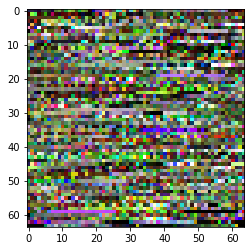

In [219]:
index = 1
plt.imshow(train_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(train_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_model['y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")